In [ ]:
"""#can skip this :)
import numpy as np
import cv2
import matplotlib.pyplot as plt

# --- Load your coordinate data ---
coords = np.loadtxt(
    "dataset/processed/p_sikku/csv_s/processed_kolam_82_sikku.csv",
    delimiter=",", skiprows=1
)  # adjust skiprows if no header
x_coords = coords[:, 0]   # first column is X
y_coords = coords[:, 1]   # second column is Y

# --- Load the original image ---
img = cv2.imread("dataset/processed/p_sikku/processed_kolam_82_sikku.jpeg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# After plt.scatter(...) and before plt.show():
out_path = "dataset/processed/p_sikku/overlay_images/processed_kolam_82_overlay.jpg"
plt.savefig(out_path, bbox_inches="tight", pad_inches=0, dpi=150)

fig, ax = plt.subplots(figsize=(1, 1), dpi=256)
ax.imshow(img_rgb)
ax.scatter(
    x_coords,
    y_coords,
    c='red',           # red fill
    edgecolors='white',# white outline
    linewidths=0.8,    # outline thickness
    s=15               # size of dots
)
ax.axis("off")
fig.savefig(out_path, dpi=256, bbox_inches="tight", pad_inches=0)
plt.close(fig)"""


<Figure size 640x480 with 0 Axes>

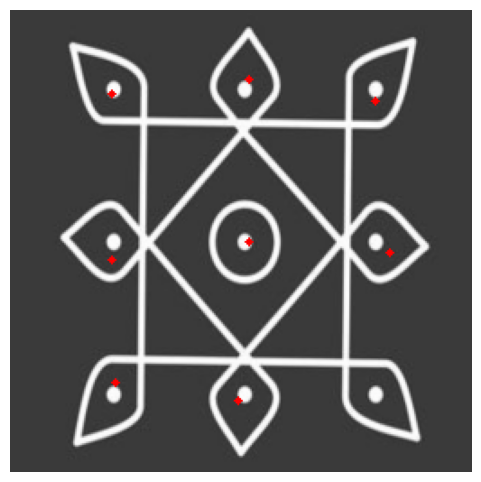

In [ ]:
""" #1 image ke liye check krna dots orginal image se match krti hai ya nhi
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Paths (replace with your own)
image_path = "dataset/processed/p_kambi/im_k/kol_k_68.png"
csv_path = "dataset/processed/p_kambi/csv_k/kol_k_68_dots.csv"

# --------------------------
# Load image
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Load dot coordinates (use only first 2 columns: x, y)
dots = np.loadtxt(csv_path, delimiter=",", skiprows=1)
dots = dots[:, :2]  # pick first two columns

# Create a copy of the image to draw dots
img_overlay = img.copy()
for dot in dots:
    x, y = dot
    cv2.circle(img_overlay, (int(x), int(y)), radius=2, color=(0, 0, 255), thickness=-1)

# Display the overlay
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img_overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()"""

In [8]:
"""import os, glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_dir      = "dataset/processed/p_pulli/im_p"
csv_dir      = os.path.join(img_dir, "csv_p")
overlay_dir  = os.path.join(img_dir, "ov_im_p_2")
os.makedirs(overlay_dir, exist_ok=True)

for csv_path in glob.glob(os.path.join(csv_dir, "*.csv")):
    name = os.path.splitext(os.path.basename(csv_path))[0]  # e.g. processed_kolam_89_sikku

    base = os.path.splitext(os.path.basename(csv_path))[0]  # e.g. processed_kolam_01_sikku
    for ext in [".jpg", ".jpeg"]:
        candidate = os.path.join(img_dir, base + ext)
        if os.path.isfile(candidate):
            img_path = candidate
            break


    # Load coordinates
    coords = np.loadtxt(csv_path, delimiter=",", skiprows=1)
    x, y = coords[:, 0], coords[:, 1]

    # Load image
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create 256×256 overlay with red dots + white outline
    fig, ax = plt.subplots(figsize=(1, 1), dpi=256)  # 1 inch × 256 dpi
    ax.imshow(img_rgb)
    ax.scatter(x, y, c="red", edgecolors="white", linewidths=0.8, s=15)
    ax.axis("off")

    out_file = os.path.join(overlay_dir, f"{name}_overlay.jpg")
    fig.savefig(out_file, dpi=256, bbox_inches="tight", pad_inches=0)
    plt.close(fig)

    print(f"Saved overlay: {out_file}")
"""

'import os, glob\nimport numpy as np\nimport cv2\nimport matplotlib.pyplot as plt\n\nimg_dir      = "dataset/processed/p_pulli/im_p"\ncsv_dir      = os.path.join(img_dir, "csv_p")\noverlay_dir  = os.path.join(img_dir, "ov_im_p_2")\nos.makedirs(overlay_dir, exist_ok=True)\n\nfor csv_path in glob.glob(os.path.join(csv_dir, "*.csv")):\n    name = os.path.splitext(os.path.basename(csv_path))[0]  # e.g. processed_kolam_89_sikku\n\n    base = os.path.splitext(os.path.basename(csv_path))[0]  # e.g. processed_kolam_01_sikku\n    for ext in [".jpg", ".jpeg"]:\n        candidate = os.path.join(img_dir, base + ext)\n        if os.path.isfile(candidate):\n            img_path = candidate\n            break\n\n\n    # Load coordinates\n    coords = np.loadtxt(csv_path, delimiter=",", skiprows=1)\n    x, y = coords[:, 0], coords[:, 1]\n\n    # Load image\n    img = cv2.imread(img_path)\n    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n\n    # Create 256×256 overlay with red dots + white outline\n

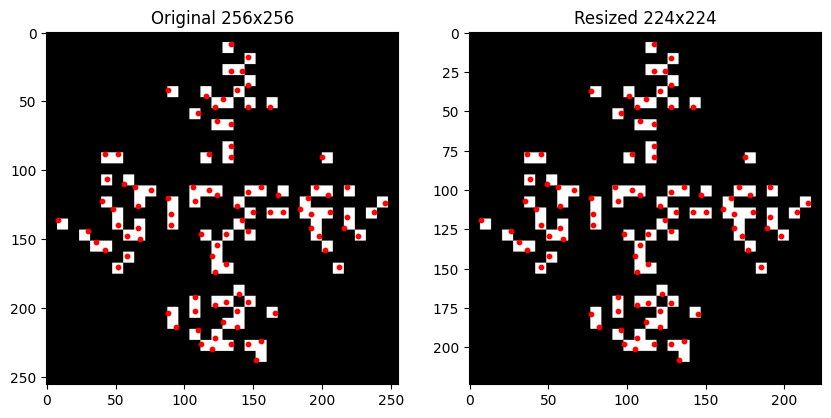

In [ ]:
""" #ye check krna ki 256 vali image aur 224 vali image mei koi data loss na hua ho
import numpy as np
import cv2
import matplotlib.pyplot as plt

# --- Load original matrix ---
npy_path = "dataset/processed/p_kambi/gr_k_cleaned/kol_k_01_dots.npy"
mat_256 = np.load(npy_path)  # shape (256, 256)

# --- Resize to 224x224 ---
mat_224 = cv2.resize(mat_256, (224, 224), interpolation=cv2.INTER_NEAREST)

# --- Optional: load dot coordinates CSV for overlay ---
csv_path = "dataset/processed/p_kambi/csv_k/kol_k_01_dots.csv"
dots = np.loadtxt(csv_path, delimiter=",", skiprows=1)  # skip header
x_coords, y_coords = dots[:,0], dots[:,1]

# --- Scale coordinates for resized matrix ---
x_scaled = x_coords * (224 / 256)
y_scaled = y_coords * (224 / 256)

# --- Visual comparison ---
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Original 256x256
axes[0].imshow(mat_256, cmap='gray')
axes[0].scatter(x_coords, y_coords, c='red', s=10)
axes[0].set_title("Original 256x256")

# Resized 224x224
axes[1].imshow(mat_224, cmap='gray')
axes[1].scatter(x_scaled, y_scaled, c='red', s=10)
axes[1].set_title("Resized 224x224")

plt.show()
"""

In [ ]:
"""import os
import numpy as np
import cv2

# --- Paths ---
input_folder = "dataset/processed/p_kambi/gr_k_cleaned"           # original 256x256 npy files
output_folder = "dataset/processed/p_kambi/k_npy_224"  # resized output

os.makedirs(output_folder, exist_ok=True)

# --- Loop through all npy files ---
for file_name in os.listdir(input_folder):
    if file_name.endswith(".npy"):
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, file_name)

        # Load original matrix
        mat = np.load(input_path)

        # Resize to 224x224
        mat_resized = cv2.resize(mat, (224, 224), interpolation=cv2.INTER_NEAREST)

        # Save resized matrix
        np.save(output_path, mat_resized)

        print(f"Resized and saved: {file_name}")

print("All matrices resized to 224x224 successfully!")
"""

Resized and saved: kol_k_01_dots.npy
Resized and saved: kol_k_02_dots.npy
Resized and saved: kol_k_03_dots.npy
Resized and saved: kol_k_04_dots.npy
Resized and saved: kol_k_05_dots.npy
Resized and saved: kol_k_06_dots.npy
Resized and saved: kol_k_07_dots.npy
Resized and saved: kol_k_08_dots.npy
Resized and saved: kol_k_09_dots.npy
Resized and saved: kol_k_100_dots.npy
Resized and saved: kol_k_10_dots.npy
Resized and saved: kol_k_11_dots.npy
Resized and saved: kol_k_12_dots.npy
Resized and saved: kol_k_13_dots.npy
Resized and saved: kol_k_14_dots.npy
Resized and saved: kol_k_15_dots.npy
Resized and saved: kol_k_16_dots.npy
Resized and saved: kol_k_17_dots.npy
Resized and saved: kol_k_18_dots.npy
Resized and saved: kol_k_19_dots.npy
Resized and saved: kol_k_20_dots.npy
Resized and saved: kol_k_21_dots.npy
Resized and saved: kol_k_22_dots.npy
Resized and saved: kol_k_23_dots.npy
Resized and saved: kol_k_24_dots.npy
Resized and saved: kol_k_25_dots.npy
Resized and saved: kol_k_26_dots.npy


In [19]:
import os
import numpy as np

# --- Paths ---
input_csv_folder = "dataset/processed/p_kambi/csv_k"          # original CSVs (256x256)
output_csv_folder = "dataset/processed/p_kambi/csv_k_224"       # scaled CSVs (224x224)

os.makedirs(output_csv_folder, exist_ok=True)

scale_factor = 224 / 256  # scale from 256 -> 224

# --- Loop through all CSVs ---
for file_name in os.listdir(input_csv_folder):
    if file_name.endswith(".csv"):
        input_path = os.path.join(input_csv_folder, file_name)
        output_path = os.path.join(output_csv_folder, file_name)

        # Load CSV (skip header)
        dots = np.loadtxt(input_path, delimiter=",", skiprows=1)
        
        if dots.size == 0:  # handle empty CSVs
            print(f"No dots found in {file_name}, skipping...")
            continue

        # Scale coordinates
        x_scaled = dots[:, 0] * scale_factor
        y_scaled = dots[:, 1] * scale_factor

        # Combine and save (with same header)
        scaled_dots = np.column_stack((x_scaled, y_scaled))
        header = "x,y"
        np.savetxt(output_path, scaled_dots, delimiter=",", header=header, comments="", fmt="%.2f")

        print(f"Scaled and saved: {file_name}")

print("All CSV dot coordinates scaled to 224x224 successfully!")


Scaled and saved: kol_k_01_dots.csv
Scaled and saved: kol_k_02_dots.csv
Scaled and saved: kol_k_03_dots.csv
Scaled and saved: kol_k_04_dots.csv
Scaled and saved: kol_k_05_dots.csv
Scaled and saved: kol_k_06_dots.csv
Scaled and saved: kol_k_07_dots.csv
Scaled and saved: kol_k_08_dots.csv
Scaled and saved: kol_k_09_dots.csv
Scaled and saved: kol_k_100_dots.csv
Scaled and saved: kol_k_10_dots.csv
Scaled and saved: kol_k_11_dots.csv
Scaled and saved: kol_k_12_dots.csv
Scaled and saved: kol_k_13_dots.csv
Scaled and saved: kol_k_14_dots.csv
Scaled and saved: kol_k_15_dots.csv
Scaled and saved: kol_k_16_dots.csv
Scaled and saved: kol_k_17_dots.csv
Scaled and saved: kol_k_18_dots.csv
Scaled and saved: kol_k_19_dots.csv
Scaled and saved: kol_k_20_dots.csv
Scaled and saved: kol_k_21_dots.csv
Scaled and saved: kol_k_22_dots.csv
Scaled and saved: kol_k_23_dots.csv
Scaled and saved: kol_k_24_dots.csv
Scaled and saved: kol_k_25_dots.csv
Scaled and saved: kol_k_26_dots.csv
Scaled and saved: kol_k_27_